<a href="https://colab.research.google.com/github/WoojinJeonkr/Data-Analysis/blob/main/Status_of_import_and_export_of_seafood_by_country_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 국가별수산물수출입현황 분석
- 사용 데이터: [해양수산부_국가별수산물수출입현황](https://www.data.go.kr/data/15102781/fileData.do)

## 01. 데이터 다운로드

In [1]:
# https://www.data.go.kr/data/15102781/fileData.do에서 데이터 다운로드

## 02. 데이터 정리

In [2]:
# 데이터 읽기
import pandas as pd
seafood = pd.read_csv('/content/해양수산부_국가별수산물수출입현황_20220630.CSV', encoding = 'euc-kr')
# 상위 5개 데이터 출력
seafood.head()

,기준년월,\t국가코드,\tHSK품목코드,\t수출입구분코드,\t수출입구분명,\t국가명,\t경제권명,\t수산물수출입품목명,\t당월수출입중량(킬로그램),\t당월수출입미화금액(달러),\t당해누계수출입중량(킬로그램),\t당해누계수출입미화금액(달러),\t데이터기준일자\t
0,2022-06,AE,301998000,E,수출,아랍에미리트연합,걸프협력회의,넙치(활어),692,20873,4409,119649,2022-06-30
1,2022-06,AE,301999099,E,수출,아랍에미리트연합,걸프협력회의,기타어류(활어),266,11445,1482,61823,2022-06-30
2,2022-06,AE,302210000,E,수출,아랍에미리트연합,걸프협력회의,"넙치(간장, 어란제외/신선, 냉장/피레트, 어육제외)",0,0,15,380,2022-06-30
3,2022-06,AE,302420000,E,수출,아랍에미리트연합,걸프협력회의,멸치(신선 또는 냉장)(엔그라울리스종),116,1506,163,2265,2022-06-30
4,2022-06,AE,302899090,E,수출,아랍에미리트연합,걸프협력회의,"기타(신선 또는 냉장)(삼치,복어,병어,아귀 외 기타)",25,666,165,4093,2022-06-30


In [3]:
# 데이터 컬럼명 확인
seafood.columns

Index(['기준년월', '\t국가코드', '\tHSK품목코드', '\t수출입구분코드', '\t수출입구분명', '\t국가명',
       '\t경제권명', '\t수산물수출입품목명', '\t당월수출입중량(킬로그램)', '\t당월수출입미화금액(달러)',
       '\t당해누계수출입중량(킬로그램)', '\t당해누계수출입미화금액(달러)', '\t데이터기준일자\t'],
      dtype='object')

In [4]:
# 데이터 컬럼명 변경
seafood.columns = ['기준년월', '국가코드', 'HSK품목코드', '수출입구분코드', '수출입구분명', '국가명',
                   '경제권명', '수산물수출입품목명', '당월수출입중량(kg)', '당월수출입미화금액($)',
                   '당해누계수출입중량(kg)', '당해누계수출입미화금액($)', '데이터기준일자']

In [5]:
# 하위 5개 출력
seafood.tail()

,기준년월,국가코드,HSK품목코드,수출입구분코드,수출입구분명,국가명,경제권명,수산물수출입품목명,당월수출입중량(kg),당월수출입미화금액($),당해누계수출입중량(kg),당해누계수출입미화금액($),데이터기준일자
5328,2022-06,ZA,1302311000,I,수입,남아프리카,NaN,실한천,0,0,0,11,2022-06-30
5329,2022-06,ZA,2008995010,I,수입,남아프리카,NaN,김,1,9,1,9,2022-06-30
5330,2022-06,ZM,106203000,I,수입,잠비아,NaN,거북,70,2600,100,5600,2022-06-30
5331,2022-06,ZZ,7116102000,E,수출,기타국,NaN,양식진주로 만든 것,5,13285,5,13285,2022-06-30
5332,2022-06,ZZ,2501009090,I,수입,기타국,NaN,"기타소금,해수",0,0,60,125,2022-06-30


In [6]:
# 수출에 관련된 데이터 확인
seafood[seafood['수출입구분명'] == '수출']

,기준년월,국가코드,HSK품목코드,수출입구분코드,수출입구분명,국가명,경제권명,수산물수출입품목명,당월수출입중량(kg),당월수출입미화금액($),당해누계수출입중량(kg),당해누계수출입미화금액($),데이터기준일자
0,2022-06,AE,301998000,E,수출,아랍에미리트연합,걸프협력회의,넙치(활어),692,20873,4409,119649,2022-06-30
1,2022-06,AE,301999099,E,수출,아랍에미리트연합,걸프협력회의,기타어류(활어),266,11445,1482,61823,2022-06-30
2,2022-06,AE,302210000,E,수출,아랍에미리트연합,걸프협력회의,"넙치(간장, 어란제외/신선, 냉장/피레트, 어육제외)",0,0,15,380,2022-06-30
3,2022-06,AE,302420000,E,수출,아랍에미리트연합,걸프협력회의,멸치(신선 또는 냉장)(엔그라울리스종),116,1506,163,2265,2022-06-30
4,2022-06,AE,302899090,E,수출,아랍에미리트연합,걸프협력회의,"기타(신선 또는 냉장)(삼치,복어,병어,아귀 외 기타)",25,666,165,4093,2022-06-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,2022-06,ZA,1605599010,E,수출,남아프리카,NaN,연체동물 기타(조제 또는 저장처리)(밀폐용기에 넣은 것),0,0,2,125,2022-06-30
5316,2022-06,ZA,2008995010,E,수출,남아프리카,NaN,김,28,886,2175,83694,2022-06-30
5317,2022-06,ZA,2501001020,E,수출,남아프리카,NaN,천일염,525,3182,1262,8274,2022-06-30
5318,2022-06,ZA,2501009090,E,수출,남아프리카,NaN,"기타소금,해수",0,0,1,12,2022-06-30


In [7]:
# 수입에 관련된 데이터 확인
seafood[seafood['수출입구분명'] == '수입']

,기준년월,국가코드,HSK품목코드,수출입구분코드,수출입구분명,국가명,경제권명,수산물수출입품목명,당월수출입중량(kg),당월수출입미화금액($),당해누계수출입중량(kg),당해누계수출입미화금액($),데이터기준일자
90,2022-06,AE,106199000,I,수입,아랍에미리트연합,걸프협력회의,기타 포유동물,6,3688,13,4198,2022-06-30
91,2022-06,AE,303892000,I,수입,아랍에미리트연합,걸프협력회의,갈치(냉동),0,0,33218,120718,2022-06-30
92,2022-06,AE,303899099,I,수입,아랍에미리트연합,걸프협력회의,기타어류(냉동),0,0,11960,23774,2022-06-30
93,2022-06,AE,1504101000,I,수입,아랍에미리트연합,걸프협력회의,상어의 간유(肝油)와 그 분획물,0,0,15200,72960,2022-06-30
94,2022-06,AE,1504109000,I,수입,아랍에미리트연합,걸프협력회의,"어류의간유,분획물(상어의간유",0,0,2,3,2022-06-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5327,2022-06,ZA,307521000,I,수입,남아프리카,NaN,문어,980,4214,980,4214,2022-06-30
5328,2022-06,ZA,1302311000,I,수입,남아프리카,NaN,실한천,0,0,0,11,2022-06-30
5329,2022-06,ZA,2008995010,I,수입,남아프리카,NaN,김,1,9,1,9,2022-06-30
5330,2022-06,ZM,106203000,I,수입,잠비아,NaN,거북,70,2600,100,5600,2022-06-30


In [8]:
# 경제권명: NaN -> 미분류로 변경
seafood['경제권명'] = seafood['경제권명'].fillna('미분류')
seafood

,기준년월,국가코드,HSK품목코드,수출입구분코드,수출입구분명,국가명,경제권명,수산물수출입품목명,당월수출입중량(kg),당월수출입미화금액($),당해누계수출입중량(kg),당해누계수출입미화금액($),데이터기준일자
0,2022-06,AE,301998000,E,수출,아랍에미리트연합,걸프협력회의,넙치(활어),692,20873,4409,119649,2022-06-30
1,2022-06,AE,301999099,E,수출,아랍에미리트연합,걸프협력회의,기타어류(활어),266,11445,1482,61823,2022-06-30
2,2022-06,AE,302210000,E,수출,아랍에미리트연합,걸프협력회의,"넙치(간장, 어란제외/신선, 냉장/피레트, 어육제외)",0,0,15,380,2022-06-30
3,2022-06,AE,302420000,E,수출,아랍에미리트연합,걸프협력회의,멸치(신선 또는 냉장)(엔그라울리스종),116,1506,163,2265,2022-06-30
4,2022-06,AE,302899090,E,수출,아랍에미리트연합,걸프협력회의,"기타(신선 또는 냉장)(삼치,복어,병어,아귀 외 기타)",25,666,165,4093,2022-06-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5328,2022-06,ZA,1302311000,I,수입,남아프리카,미분류,실한천,0,0,0,11,2022-06-30
5329,2022-06,ZA,2008995010,I,수입,남아프리카,미분류,김,1,9,1,9,2022-06-30
5330,2022-06,ZM,106203000,I,수입,잠비아,미분류,거북,70,2600,100,5600,2022-06-30
5331,2022-06,ZZ,7116102000,E,수출,기타국,미분류,양식진주로 만든 것,5,13285,5,13285,2022-06-30


In [9]:
# 기준년월이 2022-06으로 모두 같음을 알 수 있다
# 수출입구분코드에서 수출이면 E, 수입이면 I임을 알 수 있다
# 데이터 기준일자가 2022-06-30임을 알 수 있다

In [10]:
# 사용할 컬럼만 가져와 데이터 생성
seafood = seafood[['수출입구분명', '국가명', '경제권명', '수산물수출입품목명']]
seafood.head()

,수출입구분명,국가명,경제권명,수산물수출입품목명
0,수출,아랍에미리트연합,걸프협력회의,넙치(활어)
1,수출,아랍에미리트연합,걸프협력회의,기타어류(활어)
2,수출,아랍에미리트연합,걸프협력회의,"넙치(간장, 어란제외/신선, 냉장/피레트, 어육제외)"
3,수출,아랍에미리트연합,걸프협력회의,멸치(신선 또는 냉장)(엔그라울리스종)
4,수출,아랍에미리트연합,걸프협력회의,"기타(신선 또는 냉장)(삼치,복어,병어,아귀 외 기타)"


## 03. 시각화를 위한 한글 설정

In [11]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

## 04. 시각화 및 분석

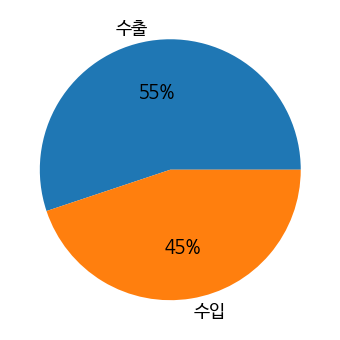

In [12]:
import matplotlib.pyplot as plt

# 수출 & 수입 비율
export_import = seafood['수출입구분명'].value_counts()
plt.rcParams["figure.figsize"] = (12,6) # size
plt.rc('font', family='NanumBarunGothic') # font
plt.pie(export_import.values, labels=export_import.index, autopct='%.f%%', textprops={'fontsize': 18})
plt.show()

In [13]:
# Insight
# 수출이 55%, 수입이 45%로 수출이 수입보다 많음을 알 수 있다

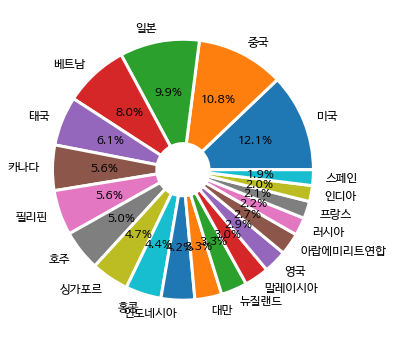

In [14]:
# 국가 비율
country = seafood['국가명'].value_counts()[:20]
plt.rcParams["figure.figsize"] = (12,6) # size
plt.rc('font', family='NanumBarunGothic') # font
wedgeprops={'width': 0.8, 'edgecolor': 'w', 'linewidth': 3} # circular sector
plt.pie(country.values, labels=country.index, autopct='%.1f%%', textprops={'fontsize': 12}, wedgeprops=wedgeprops)
plt.show()

In [15]:
# Insight
# 대한민국과 수출입 교류가 많은 나라는 미국, 중국, 일본, 베트남, 태국, 캐나다, 필리핀 순임을 알 수 있다

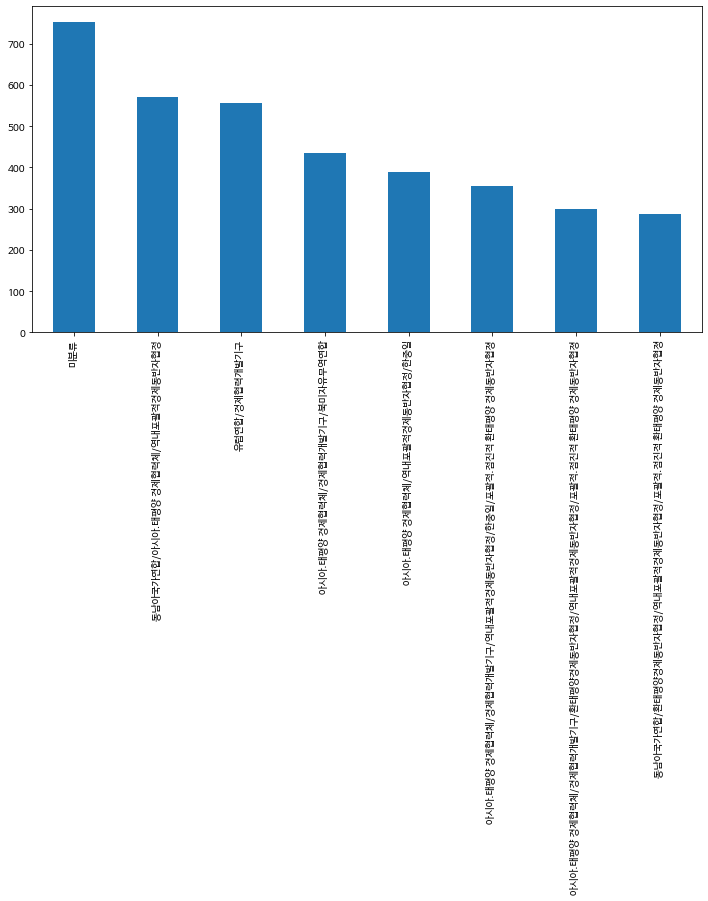

In [16]:
# 경제권 비율
union = seafood['경제권명'].value_counts()[:8]
union_index = union.index
union_count = union
# 시각화
union.plot.bar(x='union_index', y='union_count', rot=90)

In [17]:
# Insight
# 경제권적인 측면에서 동남아국가연합, 유럽연합, 북미자유무역연합에 수산물수출입이 많다는 것을 알 수 있다

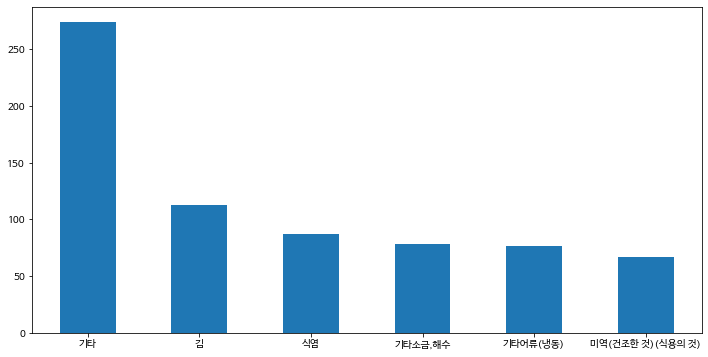

In [18]:
# 수산물수출입품목명
item = seafood['수산물수출입품목명'].value_counts()[:6]
item_index = item.index
item_count = item
# 시각화
item.plot.bar(x='item_index', y='item_count', rot=0)

In [19]:
# Insight
# 김, 식염, 기타소금/해수, 기타어류(냉동), 미역을 많이 수출입한다는 것을 알 수 있다